In [6]:
#Import libraries
import pandas as pd
from os import path

#Read file
path = "data_extraction.xlsx"
sheetNames = pd.ExcelFile(path).sheet_names
print(sheetNames)


['TAB1', 'TAB2', 'TAB3', 'TAB4', 'TAB5']


Sheet names: ['TAB1', 'TAB2', 'TAB3', 'TAB4', 'TAB5']


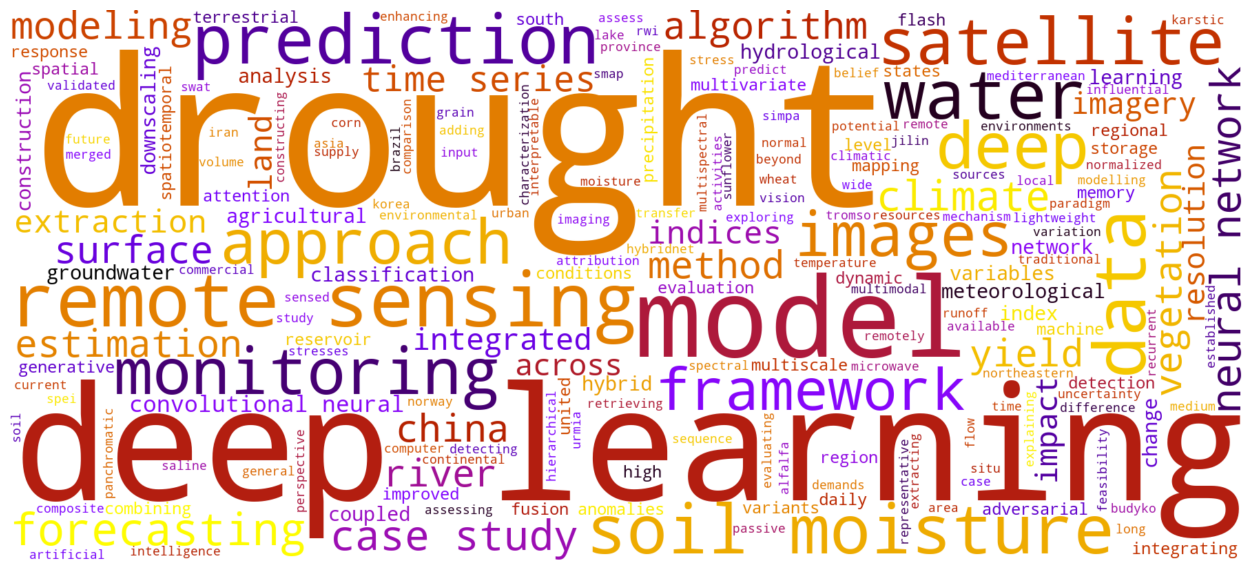

In [20]:
# Importações necessárias
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings

# Configuração global para ignorar avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configurações de imagem e estilo
plt.rcParams.update({'font.family': 'Arial', 'font.size': 14})
sns.set_palette("autumn")

# Função para gerar nuvem de palavras
def generate_wordcloud_titles(df, path_out, common_words=None):
    """
    Gera uma nuvem de palavras a partir da coluna 'title'.

    Args:
    df (DataFrame): DataFrame com a coluna 'title'.
    path_out (str): Caminho de saída para a imagem da nuvem de palavras.
    common_words (list): Lista de palavras comuns a excluir.

    Returns:
    None
    """
    if common_words is None:
        common_words = ['in', 'or', 'and', 'for', 'from', 'using', 'new', 'with', 
                        'the', 'a', 'by', 'at', 'to', 'on', 'based']
    
    all_titles = ' '.join(df['title'].dropna())  # Garantir que valores NaN sejam ignorados
    cleaned_titles = ' '.join([
        word.lower() 
        for word in all_titles.split() 
        if word.lower() not in common_words and re.match('^[a-zA-Z]+$', word)
    ])
    
    wordcloud = WordCloud(width=1800, height=800, background_color='white', 
                          colormap='gnuplot', min_font_size=10).generate(cleaned_titles)
    
    plt.figure(figsize=(16, 8))  # Tamanho da figura ajustado
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(path_out, format='pdf', bbox_inches='tight')
    plt.show()

# Caminho para o arquivo Excel
path = "data_extraction.xlsx"

# Caminho para salvar a imagem
output_path = "images/wordcloud_titles.pdf"

# Carregar dados e executar análises
try:
    # Carregar o arquivo Excel
    data_source = pd.ExcelFile(path)

    # Obter nomes das abas
    sheet_names = data_source.sheet_names
    print("Sheet names:", sheet_names)

    # Gerar nuvem de palavras para títulos
    df_titles = pd.read_excel(path, sheet_name="TAB1")
    generate_wordcloud_titles(df_titles, output_path)

except FileNotFoundError as e:
    print(f"File not found: {e.filename}")
except KeyError as e:
    print(f"Column not found: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


In [22]:
import pandas as pd

# Caminho para o arquivo Excel
path = "data_extraction.xlsx"

# Carregar a aba correspondente
df = pd.read_excel(path, sheet_name="TAB2")  # Substituir por outra aba, se necessário

# Verificar se a coluna "country_area" existe no DataFrame
if 'country_area' in df.columns:
    # Contar frequências de cada país na coluna "country_area"
    country_counts = df['country_area'].value_counts()

    # Exibir os 10 países mais frequentes
    print("Os 10 países mais frequentes:")
    print(country_counts.head(10))

    # Exibir todos os países, se necessário
    # print(country_counts)
else:
    print("A coluna 'country_area' não foi encontrada na aba especificada.")


Os 10 países mais frequentes:
country_area
China                                                                           24
United States                                                                   10
India                                                                            6
South Korea                                                                      4
Iran                                                                             4
Brazil                                                                           2
Australia                                                                        2
Spain                                                                            1
Norway                                                                           1
India; Nepal; Bhutan; Bangladesh; Pakistan; Afghanistan; Sri Lanka; Maldives     1
Name: count, dtype: int64


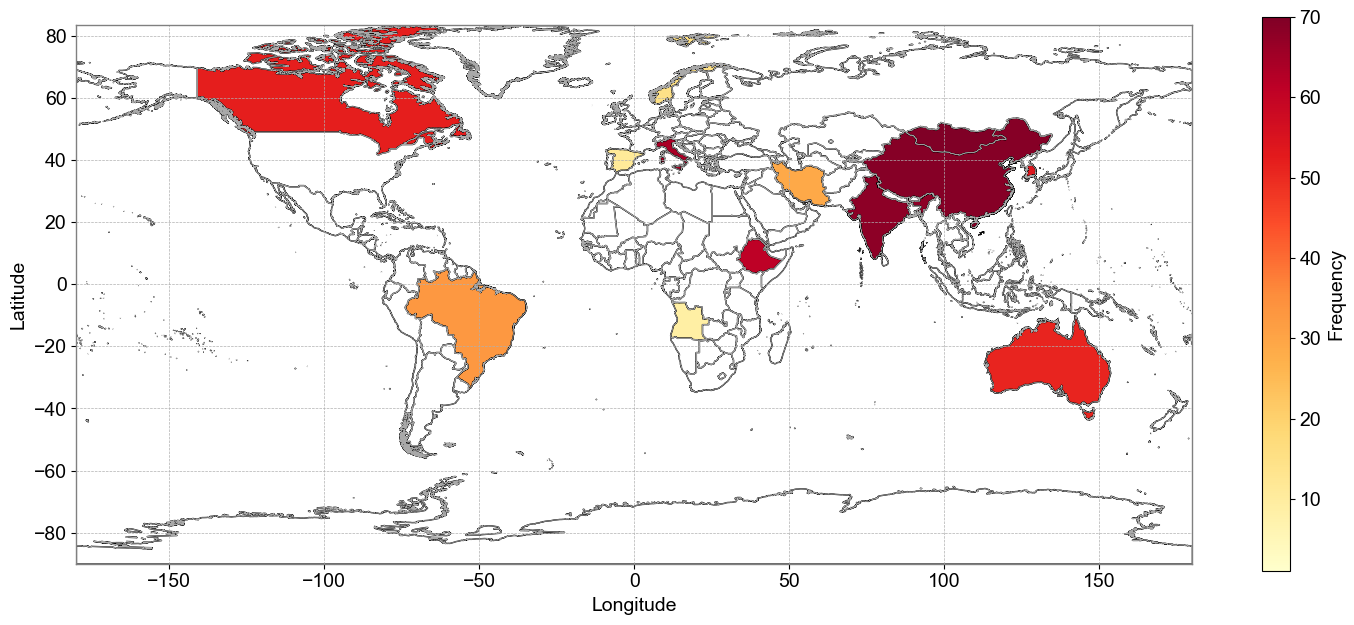

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Configurações de estilo global
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

# Caminho para os arquivos
path_shapefile = "shapefile/ne_10m_admin_0_countries.shp"
path_excel = "data_extraction.xlsx"

# Carregar shapefile e dados tabulares
data_shapefile = gpd.read_file(path_shapefile)
df = pd.read_excel(path_excel, sheet_name="TAB2")

# Normalizar strings no shapefile
data_shapefile['NAME'] = data_shapefile['NAME'].str.strip().str.lower()

# Dividir valores múltiplos em 'country_area'
df['country_area'] = df['country_area'].str.strip().str.lower()  # Normalizar strings
df = df.assign(country_area=df['country_area'].str.split(';'))  # Dividir por ';'
df = df.explode('country_area')  # Expandir múltiplos países em linhas separadas

# Realizar merge
dfCountries = data_shapefile.merge(df, how='left', left_on='NAME', right_on='country_area')

# Plotar o mapa com ajustes
fig, ax = plt.subplots(figsize=(18, 8))  # Aumentada a largura da imagem
data_shapefile.boundary.plot(ax=ax, linewidth=0.5, edgecolor='darkgray')  # Bordas para todos os países
dfCountries.plot(
    ax=ax,
    column='ID',
    legend=True,
    cmap='YlOrRd',
    edgecolor='black',  # Contorno dos países
    legend_kwds={
        'orientation': "vertical",
        'shrink': 0.9,
        'aspect': 20,
        'label': 'Frequency'
    },
    missing_kwds={"color": 'white'}  # Países sem dados sem preenchimento
)

# Configurações do mapa
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.set_xlim(dfCountries.total_bounds[[0, 2]])
ax.set_ylim(dfCountries.total_bounds[[1, 3]])
ax.grid(True, linestyle='--', linewidth=0.5)

# Personalizar bordas do gráfico
for spine in ax.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1)

# Salvar imagem como PDF
plt.savefig('images/mapCountries.pdf', bbox_inches='tight', format='pdf', dpi=300)
plt.show()


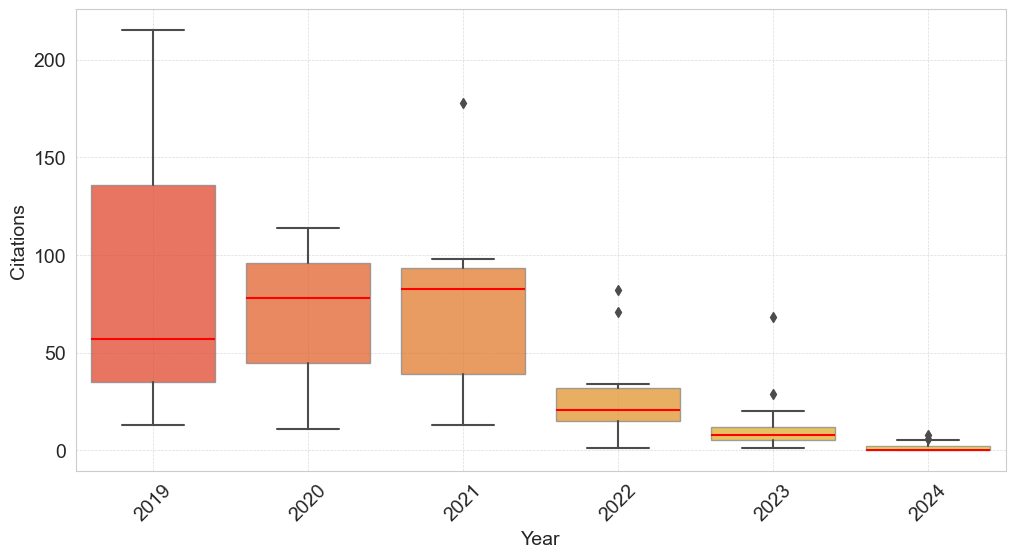

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para estilo Seaborn
sns.set_style("whitegrid")

# Caminho do arquivo Excel e leitura da primeira aba
path = "data_extraction.xlsx"
df = pd.read_excel(path, sheet_name=0)  # Usando diretamente a primeira aba

# Caminho de saída para o gráfico
path_out = 'images/boxplotCitations_year.pdf'

# Configurar a fonte para Arial e o tamanho da fonte
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = 14

# Criando o gráfico de Boxplot
fig, ax = plt.subplots(figsize=(12, 6))
palette = sns.color_palette("autumn", len(df['year'].unique()))  # Paleta de cores para diferentes anos

# Plot do Boxplot
sns.boxplot(
    x='year', y='citations', data=df, ax=ax, palette=palette,
    boxprops=dict(alpha=0.7),  # Ajustar transparência das caixas
    medianprops=dict(color="red", linewidth=1.5)  # Estilo da linha mediana
)

# Personalização do gráfico
#ax.set_title("Distribution of Citations per Year", fontsize=16, pad=15)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Citations", fontsize=14)
ax.tick_params(axis='x', rotation=45)  # Rotação dos rótulos do eixo X
ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)  # Grade leve no fundo

# Adicionar bordas aos boxes
for patch in ax.patches:
    patch.set_edgecolor('gray')  # Cor das bordas das caixas
    patch.set_linewidth(1)

# Adicionar anotações (opcional: médias ou outliers)
# for i, year in enumerate(df['year'].unique()):
#     mean_value = df[df['year'] == year]['citations'].mean()
#     ax.text(i, mean_value + 2, f'{mean_value:.1f}', color='black', ha='center', fontsize=12)

# Salvar o gráfico em PDF
plt.savefig(path_out, bbox_inches='tight', format='pdf', dpi=300)

# Exibindo o gráfico
plt.show()


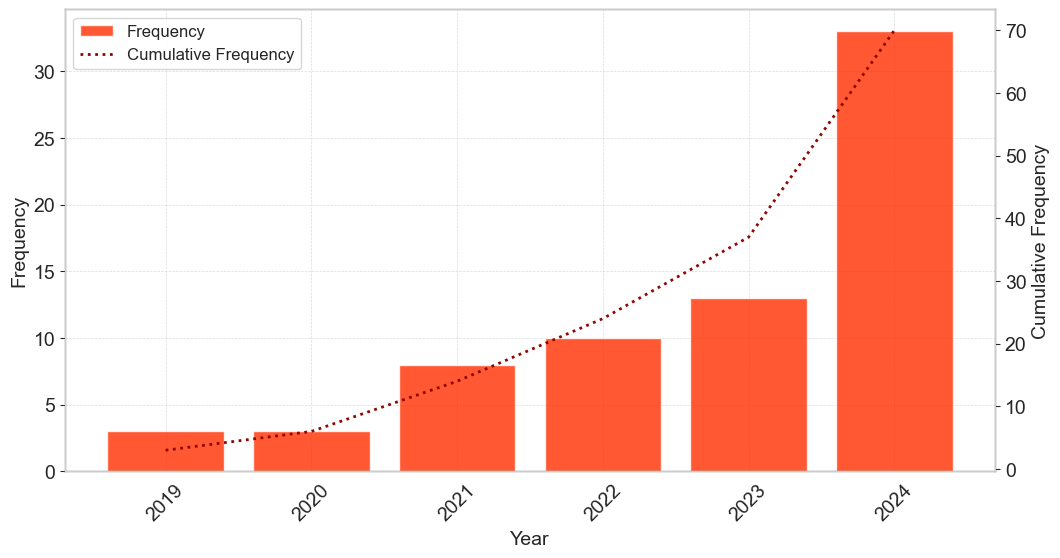

   Year  Frequency  Cumulative  Percentage
0  2019          3           3    4.285714
1  2020          3           6    4.285714
2  2021          8          14   11.428571
3  2022         10          24   14.285714
4  2023         13          37   18.571429
5  2024         33          70   47.142857


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Função para análise de frequência por ano
def analyze_year_frequencies(path, sheet_index=0):
    # Carregar o dataframe
    df = pd.read_excel(path, sheet_name=sheet_index)

    # Contar a frequência anual
    df_year_counts = df['year'].value_counts().sort_index(ascending=True)

    # Criar o DataFrame com as colunas de frequência, cumulativa e percentual
    df_analysis = pd.DataFrame({
        'Year': df_year_counts.index,
        'Frequency': df_year_counts.values,
        'Cumulative': df_year_counts.cumsum().values
    })

    # Calcular o percentual de cada frequência
    df_analysis['Percentage'] = (df_analysis['Frequency'] / df_analysis['Frequency'].sum()) * 100

    return df_analysis

# Função para plotar o gráfico de barras e linha cumulativa
def plot_year_frequency_cumulative_chart(df_analysis, path_out='images/yearFrequencyBars+CumulativeAxis.pdf'):
    # Configuração da fonte e estilo
    sns.set_style("whitegrid")
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 14

    # Criar o gráfico com dois eixos Y
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plotando as barras de frequência
    bar_colors = sns.color_palette("autumn", n_colors=10)
    bars = ax1.bar(
        df_analysis['Year'], df_analysis['Frequency'], color=bar_colors[1], alpha=0.8, label='Frequency'
    )

    # Ajustando o eixo Y para a frequência
    ax1.set_ylabel("Frequency", fontsize=14)
    ax1.set_xlabel("Year", fontsize=14)
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)  # Adiciona grade ao fundo

    # Configurando o eixo X
    ax1.set_xticks(df_analysis['Year'])

    # Criando o segundo eixo Y para a frequência cumulativa
    ax2 = ax1.twinx()
    ax2.plot(
        df_analysis['Year'], df_analysis['Cumulative'], color=sns.color_palette("dark")[3],
        linestyle='dotted', linewidth=2, label='Cumulative Frequency'
    )

    # Ajustando o eixo Y para a frequência cumulativa
    ax2.set_ylabel("Cumulative Frequency", fontsize=14)
    ax2.grid(False)  # Remover grade do eixo secundário

    # Adicionando legendas combinadas
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

    # Personalizando a borda do gráfico
    for spine in ax1.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1)

    # Adicionando título ao gráfico
    #ax1.set_title("Yearly Distribution of Articles and Cumulative Trend", fontsize=16, pad=15)

    # Salvando o gráfico como PDF
    plt.savefig(path_out, bbox_inches='tight', format='pdf', dpi=300)

    # Exibindo o gráfico
    plt.show()

# Exemplo de uso
path = "data_extraction.xlsx"
df_analysis_year = analyze_year_frequencies(path)
plot_year_frequency_cumulative_chart(df_analysis_year, path_out='images/yearFrequencyBars+CumulativeAxis.pdf')

# Exibindo a análise de frequência por ano
print(df_analysis_year)


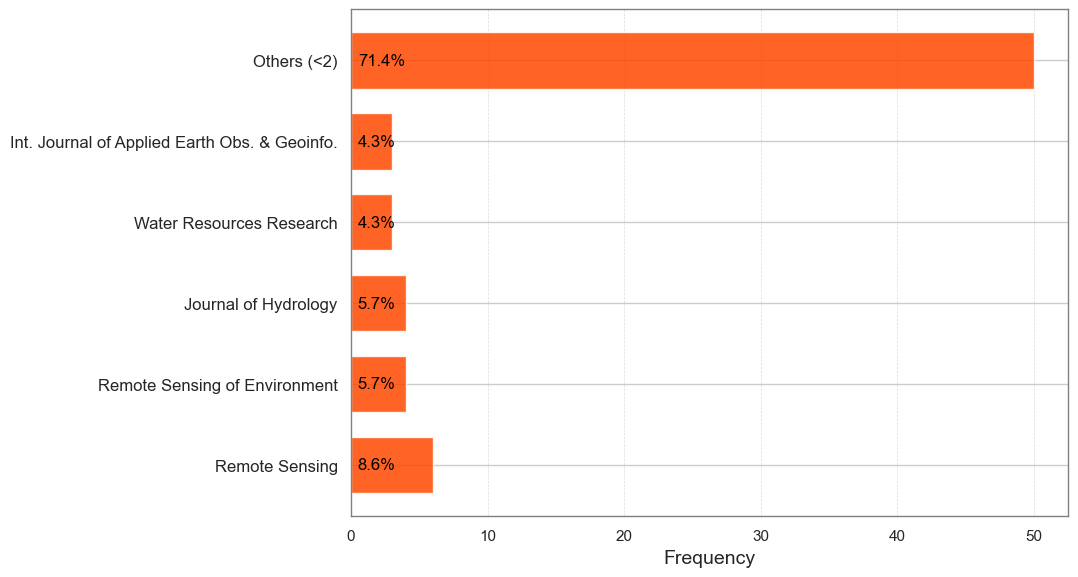

                                         Journal  Frequency
0                                 Remote Sensing          6
1                  Remote Sensing of Environment          4
2                           Journal of Hydrology          4
3                       Water Resources Research          3
4  Int. Journal of Applied Earth Obs. & Geoinfo.          3
5                                    Others (<2)         50


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Função para analisar a frequência de periódicos
def analyze_journal_frequencies(path, sheet_index=0, threshold=2):
    df = pd.read_excel(path, sheet_name=sheet_index)
    journal_counts = df['journal'].value_counts()
    frequent_journals = journal_counts[journal_counts > threshold]
    other_journals_count = journal_counts[journal_counts <= threshold].sum()
    if other_journals_count > 0:
        frequent_journals[f'Others (<{threshold})'] = other_journals_count
    df_analysis = pd.DataFrame({
        'Journal': frequent_journals.index,
        'Frequency': frequent_journals.values
    })
    df_analysis = df_analysis[df_analysis['Journal'] != 'IEEE Access']
    return df_analysis

# Função para plotar gráfico de barras horizontais
def plot_journal_bar_chart(df_analysis, path_out='images/most_used_journals_bar_chart.pdf'):
    sns.set_theme(style="whitegrid", palette="autumn")
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 14

    abbreviations = {
        'Environmental Science and Pollution Research': 'Environ. Science & Pollution Research',
        'Stochastic Environmental Research and Risk Assessment': 'Stochastic Environ. Research & Risk Assessment',
        'International Journal of Applied Earth Observation and Geoinformation': 'Int. Journal of Applied Earth Obs. & Geoinfo.',
        'Science of The Total Environment': 'Science of Total Environment',
    }
    df_analysis['Journal'] = df_analysis['Journal'].apply(lambda x: abbreviations.get(x, x))

    fig, ax = plt.subplots(figsize=(11, 6))
    bars = ax.barh(
        df_analysis['Journal'], df_analysis['Frequency'],
        color=sns.color_palette("autumn")[1], edgecolor="w", height=0.7, alpha=0.85
    )

    ax.set_xlabel("Frequency", fontsize=14)
    ax.set_ylabel("", fontsize=14)
    ax.grid(True, axis='x', linestyle='--', linewidth=0.5, alpha=0.7)

    total_frequency = df_analysis['Frequency'].sum()
    labels = [f'{freq / total_frequency * 100:.1f}%' for freq in df_analysis['Frequency']]

    for bar, label in zip(bars, labels):
        ax.text(
            0.5,  # Posição fixa mais à esquerda
            bar.get_y() + bar.get_height() / 2, label,
            ha='left', va='center', fontsize=12, color='black'
        )

    ax.tick_params(axis='y', labelsize=12)
    plt.tight_layout()

    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1)

    plt.savefig(path_out, bbox_inches='tight', format='pdf', dpi=300)
    plt.show()

# Exemplo de uso
path = "data_extraction.xlsx"
df_analysis_journal = analyze_journal_frequencies(path)
plot_journal_bar_chart(df_analysis_journal, path_out='images/most_used_journals_bar_chart.pdf')

print(df_analysis_journal)


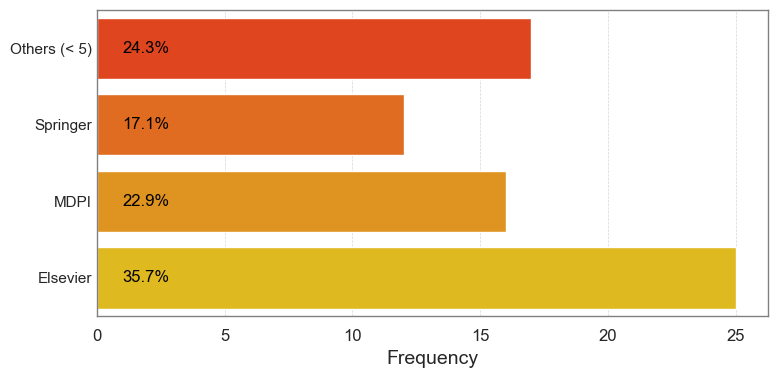

      Publisher  Frequency
0      Elsevier         25
1          MDPI         16
2      Springer         12
3  Others (< 5)         17


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Função para analisar a frequência de publishers
def analyze_publisher_frequencies(path, sheet_index=0, threshold=5):
    df = pd.read_excel(path, sheet_name=sheet_index)
    publisher_counts = df['publisher'].value_counts()
    frequent_publisher = publisher_counts[publisher_counts > threshold]
    other_publisher_count = publisher_counts[publisher_counts <= threshold].sum()
    if other_publisher_count > 0:
        frequent_publisher[f'Others (< {threshold})'] = other_publisher_count
    df_analysis = pd.DataFrame({
        'Publisher': frequent_publisher.index,
        'Frequency': frequent_publisher.values
    })
    return df_analysis

# Função para plotar o gráfico de barras horizontais
def plot_publisher_bar_chart(df_analysis, path_out='images/most_used_publisher_bar_chart.pdf'):
    # Configurações de tema e estilo
    sns.set_theme(style="whitegrid")
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 14

    # Reorganizar para que "Others" seja a primeira barra
    df_analysis = df_analysis.sort_values(by='Frequency', ascending=True)
    others_row = df_analysis[df_analysis['Publisher'].str.startswith('Others')].copy()
    df_analysis = pd.concat([others_row, df_analysis.drop(others_row.index)], ignore_index=True)

    # Calcular porcentagens
    total_publishers = df_analysis['Frequency'].sum()
    df_analysis['Percentage'] = (df_analysis['Frequency'] / total_publishers) * 100

    # Ajustar paleta de cores
    colors = sns.color_palette("autumn", len(df_analysis))

    # Criar gráfico de barras horizontais
    fig, ax = plt.subplots(figsize=(8, 4))
    plot = sns.barplot(
        x='Frequency',
        y='Publisher',
        data=df_analysis,
        palette=colors,
        ci=None,
        order=df_analysis['Publisher'],
        ax=ax
    )

    # Adicionar porcentagens à esquerda no início de cada barra
    for index, percentage in enumerate(df_analysis['Percentage']):
        ax.text(
            1,  # Deslocamento fixo no eixo x para alinhar à esquerda
            index, 
            f'{percentage:.1f}%', 
            va='center', 
            ha='left', 
            fontsize=12, 
            color='black'
        )

    # Configurações de eixos
    ax.set_xlabel('Frequency', fontsize=14)
    ax.set_ylabel('')
    ax.grid(True, axis='x', linestyle='--', linewidth=0.5, alpha=0.8)

    # Remover ticks do eixo y
    ax.tick_params(axis='y', which='both', length=0)
    ax.tick_params(axis='x', labelsize=12)

    # Ajustar bordas
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1)

    # Ajustar layout
    plt.tight_layout()

    # Salvar o gráfico
    plt.savefig(path_out, bbox_inches='tight', format='pdf', dpi=300)
    plt.show()

# Exemplo de uso
path = "data_extraction.xlsx"
df_analysis_publisher = analyze_publisher_frequencies(path)
plot_publisher_bar_chart(df_analysis_publisher, path_out='images/most_used_publisher_bar_chart.pdf')

print(df_analysis_publisher)


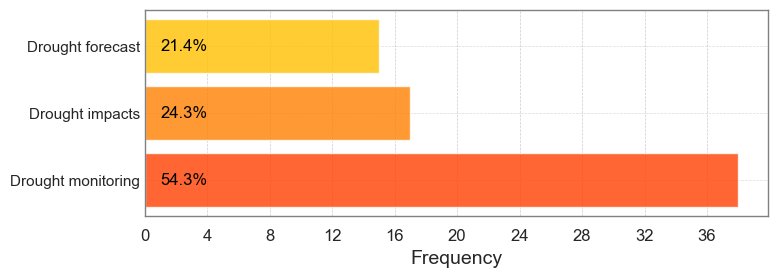

              Purpose  Frequency  Percentage
0  Drought monitoring         38   54.285714
1     Drought impacts         17   24.285714
2    Drought forecast         15   21.428571


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# Função para analisar a frequência de propósitos
def analyze_purpose_frequencies(file_path, sheet_index=1):
    df = pd.read_excel(file_path, sheet_name=sheet_index)
    df['criteria'] = df['criteria'].astype(CategoricalDtype())
    purpose_counts = df['criteria'].value_counts()

    total_studies = len(df)
    df_analysis = pd.DataFrame({
        'Purpose': purpose_counts.index,
        'Frequency': purpose_counts.values,
        'Percentage': (purpose_counts.values / total_studies) * 100
    })

    return df_analysis

# Função para plotar o gráfico de barras horizontais
def plot_purpose_bar_chart(df_analysis, path_out='images/purposeBar_chart', format='pdf'):
    sns.set_theme(style="whitegrid", palette="autumn")
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 14

    # Ordenar os propósitos pela frequência em ordem decrescente
    df_analysis = df_analysis.sort_values(by='Frequency', ascending=False)

    fig, ax = plt.subplots(figsize=(8, 3))  # Ajuste do tamanho da figura
    colors = sns.color_palette("autumn", len(df_analysis))

    bars = ax.barh(df_analysis['Purpose'], df_analysis['Frequency'], color=colors, edgecolor="w", height=0.8, alpha=0.8)

    # Adicionar porcentagens alinhadas à esquerda
    for bar, percentage in zip(bars, df_analysis['Percentage']):
        ax.text(1, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%', ha='left', va='center', fontsize=12, color='black')

    # Configurações dos eixos
    ax.set_xlabel("Frequency", fontsize=14)
    ax.set_ylabel("", fontsize=14)
    ax.grid(True, axis='x', linestyle='--', linewidth=0.5)
    ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

    # Remover ticks do eixo y
    ax.tick_params(axis='y', which='both', length=0)
    ax.tick_params(axis='x', labelsize=12)

    # Ajustar o número de divisões no eixo x
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

    # Alterar a cor da borda do gráfico
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1)

    # Ajustar layout
    plt.tight_layout()

    # Salvar o gráfico como PDF
    plt.savefig(f'{path_out}.{format}', bbox_inches='tight', format=format, dpi=300)
    plt.show()

##############################################################################################

file_path = "data_extraction.xlsx"
df_analysis_purpose = analyze_purpose_frequencies(file_path)
plot_purpose_bar_chart(df_analysis_purpose, path_out='images/purposeBar_chart', format='pdf')

print(df_analysis_purpose)


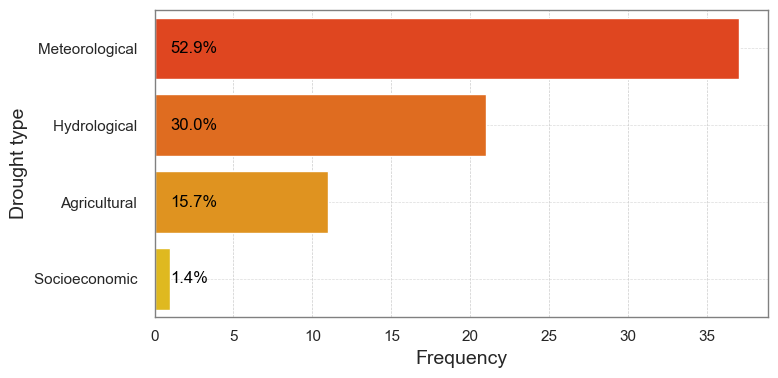

      Drought type  Frequency  Percentage
0  Meteorological          37   52.857143
1    Hydrological          21   30.000000
2    Agricultural          11   15.714286
3   Socioeconomic           1    1.428571


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Função para analisar a frequência dos tipos de seca
def analyze_drought_type_frequencies(file_path, sheet_index=1):
    df = pd.read_excel(file_path, sheet_name=sheet_index)
    df['drought_type'] = df['drought_type'].astype('category')
    drought_type_counts = df['drought_type'].value_counts()

    total_studies = len(df)
    df_analysis = pd.DataFrame({
        'Drought type': drought_type_counts.index,
        'Frequency': drought_type_counts.values,
        'Percentage': (drought_type_counts.values / total_studies) * 100
    })

    return df_analysis

# Função para plotar o gráfico de barras dos tipos de seca
def plot_drought_type_bar_chart(df_analysis, path_out='images/droughtType_bar_chart', format='pdf'):

    # Configurar o estilo da imagem
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 14

    # Definir a paleta de cores
    colors = sns.color_palette("autumn", len(df_analysis))

    # Criar o gráfico de barras
    fig, ax = plt.subplots(figsize=(8, 4))  # Ajuste o tamanho da figura conforme necessário

    # Ordenar os dados para que a categoria com maior frequência apareça primeiro
    plot = sns.barplot(
        x='Frequency',
        y='Drought type',
        data=df_analysis,
        ci=None,
        palette=colors,
        order=df_analysis.sort_values(by='Frequency', ascending=False)['Drought type'],
        ax=ax
    )

    # Adicionar porcentagens à esquerda no início de cada barra
    for index, percentage in enumerate(df_analysis['Percentage']):
        ax.text(
            1,  # Alinhar as porcentagens à esquerda no início de cada barra
            index,
            f'{percentage:.1f}%', 
            va='center', 
            ha='left', 
            fontsize=12, 
            color='black'
        )

    # Configurações do gráfico
    ax.set_xlabel('Frequency', fontsize=14)
    ax.set_ylabel('Drought type', fontsize=14)

    # Adicionar grade no eixo x
    ax.grid(True, axis='x', linestyle='--', linewidth=0.5)

    # Grade mais leve no eixo y
    ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

    # Alterar a cor das bordas do gráfico
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1)

    # Ajustar layout
    plt.tight_layout()

    # Salvar o gráfico como PDF
    plt.savefig(f'{path_out}.{format}', bbox_inches='tight', format=format, dpi=300)
    plt.show()

# Exemplo de uso
file_path = "data_extraction.xlsx"
df_analysis_drought_type = analyze_drought_type_frequencies(file_path)
plot_drought_type_bar_chart(df_analysis_drought_type, path_out='images/droughtType_bar_chart', format='pdf')

print(df_analysis_drought_type)


In [5]:
# Configurar a fonte global
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

# Carregar a segunda planilha do arquivo Excel
df = pd.read_excel('data_extraction.xlsx', sheet_name=2)

# Verificar e imprimir os nomes das colunas
print("Colunas disponíveis no DataFrame:", df.columns)

# Certifique-se de que os nomes das colunas estão corretos
model_column = 'model'
architecture_column = 'model_architeture'

# Verificar se as colunas existem no DataFrame
if model_column not in df.columns or architecture_column not in df.columns:
    raise KeyError(f"As colunas '{model_column}' ou '{architecture_column}' não foram encontradas na planilha.")

# Função auxiliar para dividir strings e lidar com valores nulos
def split_and_strip(cell):
    if pd.isna(cell):
        return []
    return [item.strip() for item in str(cell).split(';')]

# Contar ocorrências de cada modelo e arquitetura
model_counter = Counter()
architecture_counter = Counter()

for index, row in df.iterrows():
    models = split_and_strip(row[model_column])
    architectures = split_and_strip(row[architecture_column])
    
    model_counter.update(models)
    architecture_counter.update(architectures)

# Filtrar itens que aparecem mais de 3 vezes e eliminar "ANN" e "DNN"
filtered_models = {model for model, count in model_counter.items() if count > 3 and model not in {'ANN', 'DNN'}}
filtered_architectures = {architecture for architecture, count in architecture_counter.items() if count > 2 and architecture not in {'ANN', 'DNN', 'DBN'}}

# Criar um gráfico de rede
G = nx.Graph()

# Processar os dados filtrados
for index, row in df.iterrows():
    models = split_and_strip(row[model_column])
    architectures = split_and_strip(row[architecture_column])
    
    for model in models:
        if model in filtered_models:
            for architecture in architectures:
                if architecture in filtered_architectures:
                    # Adicionar nós e arestas ao gráfico
                    G.add_node(model, type='model')
                    G.add_node(architecture, type='architecture')
                    G.add_edge(model, architecture)

# Definir as posições dos nós
pos = nx.spring_layout(G)

# Aumentar o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 6))  # Ajuste o tamanho da figura conforme necessário

# Desenhar os nós
model_nodes = [node for node, data in G.nodes(data=True) if data['type'] == 'model']
architecture_nodes = [node for node, data in G.nodes(data=True) if data['type'] == 'architecture']

nx.draw_networkx_nodes(G, pos, nodelist=model_nodes, node_color='orange', node_size=300, alpha=0.6, label='Model')
nx.draw_networkx_nodes(G, pos, nodelist=architecture_nodes, node_color='red', node_size=300, alpha=0.6, label='Architecture')

# Desenhar as arestas
nx.draw_networkx_edges(G, pos, alpha=0.4)

# Adicionar rótulos aos nós
nx.draw_networkx_labels(G, pos, font_size=14)  # Ajuste o tamanho da fonte para 14

# Adicionar legenda
plt.legend(scatterpoints=1, loc='upper left', fontsize=14)  # Ajuste o tamanho da fonte da legenda para 14

# Remover a grade do gráfico
plt.grid(False)

# Remover bordas (spines) do gráfico
for spine in ax.spines.values():
    spine.set_color('none')  # Torna a borda transparente
    spine.set_linewidth(0)  # Remove a espessura da borda

# Salvar o gráfico como um arquivo PDF
path_out = 'images/relationship_DLmodels.pdf'
plt.savefig(path_out, bbox_inches='tight', pad_inches=0)
# Mostrar o gráfico
plt.show()


Colunas disponíveis no DataFrame: Index(['ID', 'model_architeture', 'model', 'other_methods', 'optimizers',
       'activation_functions', 'layers', 'epochs', 'learning_rate',
       'batch_size', 'assessment_metrics', 'frameworks'],
      dtype='object')


NameError: name 'nx' is not defined

Colunas disponíveis no DataFrame: Index(['ID', 'model_architeture', 'model', 'other_methods', 'optimizers',
       'activation_functions', 'layers', 'epochs', 'learning_rate',
       'batch_size', 'assessment_metrics', 'frameworks'],
      dtype='object')


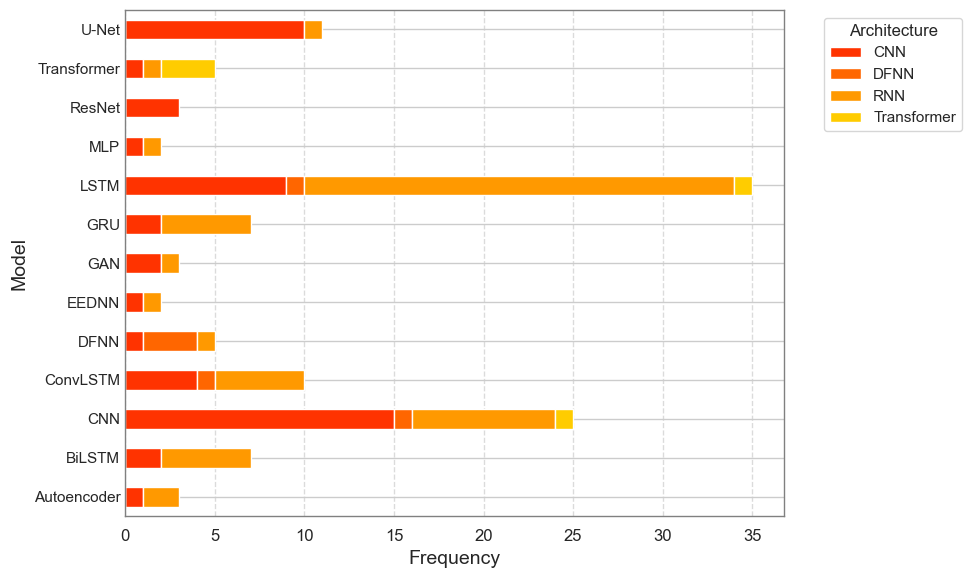

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Configurar a fonte global
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

# Carregar a segunda planilha do arquivo Excel
df = pd.read_excel('data_extraction.xlsx', sheet_name=2)

# Verificar e imprimir os nomes das colunas
print("Colunas disponíveis no DataFrame:", df.columns)

# Certifique-se de que os nomes das colunas estão corretos
model_column = 'model'
architecture_column = 'model_architeture'

# Verificar se as colunas existem no DataFrame
if model_column not in df.columns or architecture_column not in df.columns:
    raise KeyError(f"As colunas '{model_column}' ou '{architecture_column}' não foram encontradas na planilha.")

# Função auxiliar para dividir strings e lidar com valores nulos
def split_and_strip(cell):
    if pd.isna(cell):
        return []
    return [item.strip() for item in str(cell).split(';')]

# Contar ocorrências de cada modelo e arquitetura
model_counter = Counter()
architecture_counter = Counter()
model_architecture_pairs = Counter()

for index, row in df.iterrows():
    models = split_and_strip(row[model_column])
    architectures = split_and_strip(row[architecture_column])
    
    model_counter.update(models)
    architecture_counter.update(architectures)
    
    for model in models:
        for architecture in architectures:
            model_architecture_pairs[(model, architecture)] += 1

# Filtrar itens que aparecem mais de 3 vezes e eliminar "ANN" e "DNN"
filtered_models = {model for model, count in model_counter.items() if count > 1 and model not in {'ANN', 'DNN'}}
filtered_architectures = {architecture for architecture, count in architecture_counter.items() if count > 2 and architecture not in {'ANN', 'DNN', 'DBN'}}

# Preparar os dados para o gráfico de barras empilhadas
data = []

for (model, architecture), count in model_architecture_pairs.items():
    if model in filtered_models and architecture in filtered_architectures:
        data.append((model, architecture, count))

# Converter para DataFrame para facilitar a plotagem
plot_df = pd.DataFrame(data, columns=['Model', 'Architecture', 'Count'])

# Pivotar o DataFrame para obter a contagem por modelo e arquitetura
pivot_df = plot_df.pivot(index='Model', columns='Architecture', values='Count').fillna(0)

# Obter a paleta 'autumn' com cores suficientes para as arquiteturas
num_architectures = len(pivot_df.columns)
autumn_colors = sns.color_palette("autumn", num_architectures)  # Gerar uma paleta de cores com número específico

# Plotar o gráfico de barras empilhadas com cores ajustadas
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 6), color=autumn_colors)

# Adicionar grade no eixo x
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Remover marcas espessas no eixo y
ax.tick_params(axis='y', which='both', length=0)

# Alterar a cor da borda do gráfico
for spine in ax.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1)

# Configurações do gráfico
ax.set_xlabel("Frequency", fontsize=14)
ax.set_ylabel("Model", fontsize=14)
ax.legend(title='Architecture', bbox_to_anchor=(1.05, 1), loc='upper left')

# Alinhar os rótulos do eixo x
plt.xticks(rotation=0, fontsize=12)

# Ajustar o layout para não cortar elementos
plt.tight_layout()

# Salvar o gráfico como um arquivo PDF
path_out = 'images/model_architecture_frequency_horizontal.pdf'
plt.savefig(path_out, bbox_inches='tight', format='pdf', dpi=300)

# Mostrar o gráfico
plt.show()


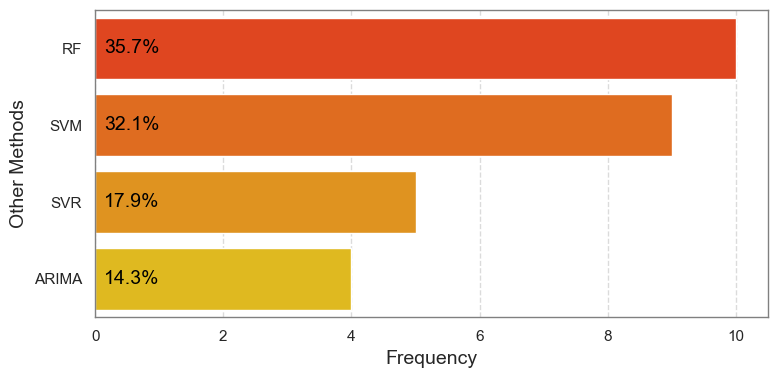

  Method  Frequency
3     RF         10
1    SVM          9
2    SVR          5
0  ARIMA          4


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.ticker import MaxNLocator

def analyze_sensor_frequencies(path, sheet_index=2, threshold=2):
    # Carregar o arquivo Excel
    df = pd.read_excel(path, sheet_name=sheet_index)
    
    # Preencher valores NaN na coluna 'Other methods' com uma string vazia
    df['other_methods'] = df['other_methods'].fillna('')

    # Remover entradas vazias na coluna 'Other methods'
    df = df[df['other_methods'] != '']

    # Dividir os sensores separados por ';' e remover espaços extras
    df['other_methods'] = df['other_methods'].str.split(';').apply(lambda x: [sensor.strip() for sensor in x])

    # Explodir a coluna para criar linhas duplicadas para cada sensor
    df = df.explode('other_methods')

    # Contagem de frequência dos sensores
    sensor_counts = Counter(df['other_methods'])

    # Filtrar sensores que aparecem mais que 'threshold' vezes
    frequent_sensors = {sensor: count for sensor, count in sensor_counts.items() if count > threshold}

    # Criar DataFrame de análise
    df_analysis = pd.DataFrame({
        'Method': list(frequent_sensors.keys()),
        'Frequency': list(frequent_sensors.values())
    })

    # Ordenar por frequência
    df_analysis = df_analysis.sort_values(by='Frequency', ascending=False)

    return df_analysis

def plot_sensor_bar_chart(df_analysis, path_out='images/frequent_sensors.pdf'):
    # Configurar o estilo e a paleta de cores usando seaborn
    sns.set_theme(style="whitegrid")  # Ajuste o estilo conforme o padrão dos outros gráficos
    palette = sns.color_palette("autumn", n_colors=len(df_analysis))  # Use uma paleta de cores listada

    # Configurar a fonte para Arial e o tamanho da fonte
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 14
    
    # Criar o gráfico de barras horizontais
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x='Frequency', y='Method', data=df_analysis, palette=palette)

    # Ajustes finais no gráfico
    ax.set_xlabel("Frequency", fontsize=14)
    ax.set_ylabel("Other Methods", fontsize=14)

    # Adicionar porcentagens no início das barras
    total_sensors = df_analysis['Frequency'].sum()
    for p in ax.patches:
        width = p.get_width()
        percentage = f'{width / total_sensors * 100:.1f}%'
        ax.text(p.get_x() + 1, p.get_y() + p.get_height() / 2., 
                percentage, ha='right', va='center', fontsize=14, color='black')

    # Adicionar borda cinza e largura 1
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1)

    # Adicionar grade no eixo x
    ax.xaxis.grid(True, linestyle='--', alpha=0.7)

    # Configurar ticks do eixo x para mostrar apenas números inteiros
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Ajustar o layout para não cortar elementos
    plt.tight_layout()

    # Salvando o gráfico como um arquivo PDF
    plt.savefig(path_out, bbox_inches='tight', format='pdf', dpi=300)
    plt.show()

# Exemplo de uso:
path = "data_extraction.xlsx"
df_sensor_analysis = analyze_sensor_frequencies(path)
plot_sensor_bar_chart(df_sensor_analysis, path_out='images/frequent_methodsIA.pdf')

# Imprimir o DataFrame de análise para verificar os resultados
print(df_sensor_analysis)


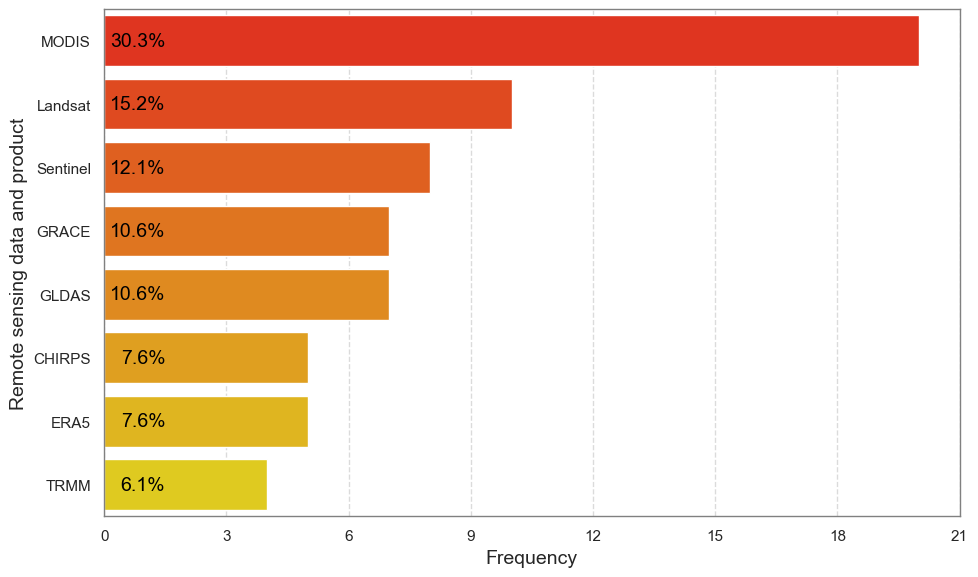

     Sensor  Frequency
0     MODIS         20
5   Landsat         10
1  Sentinel          8
4     GRACE          7
7     GLDAS          7
2    CHIRPS          5
3      ERA5          5
6      TRMM          4


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.ticker import MaxNLocator

def analyze_sensor_frequencies(path, sheet_index=1, threshold=3):
    # Carregar o arquivo Excel
    df = pd.read_excel(path, sheet_name=sheet_index)
    
    # Preencher valores NaN na coluna 'SR product' com uma string vazia
    df['sensor'] = df['sensor'].fillna('')

    # Remover entradas vazias na coluna 'SR product'
    df = df[df['sensor'] != '']

    # Dividir os sensores separados por ';' e remover espaços extras
    df['sensor'] = df['sensor'].str.split(';').apply(lambda x: [sensor.strip() for sensor in x])

    # Explodir a coluna para criar linhas duplicadas para cada sensor
    df = df.explode('sensor')

    # Contagem de frequência dos sensores
    sensor_counts = Counter(df['sensor'])

    # Filtrar sensores que aparecem mais que 'threshold' vezes
    frequent_sensors = {sensor: count for sensor, count in sensor_counts.items() if count > threshold}

    # Criar DataFrame de análise
    df_analysis = pd.DataFrame({
        'Sensor': list(frequent_sensors.keys()),
        'Frequency': list(frequent_sensors.values())
    })

    # Ordenar por frequência
    df_analysis = df_analysis.sort_values(by='Frequency', ascending=False)

    return df_analysis

def plot_sensor_bar_chart(df_analysis, path_out='images/frequent_sensors.pdf'):
    # Configurar o estilo e a paleta de cores usando seaborn
    sns.set_theme(style="whitegrid")  # Ajuste do estilo para ficar consistente com os outros gráficos
    palette = sns.color_palette("autumn", n_colors=len(df_analysis))  # Ajuste da paleta de cores

    # Configurar a fonte para Arial e o tamanho da fonte
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 14
    
    # Criando o gráfico de barras horizontais
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Frequency', y='Sensor', data=df_analysis, palette=palette)

    # Configurações do gráfico
    ax.set_xlabel("Frequency", fontsize=14)
    ax.set_ylabel("Remote sensing data and product", fontsize=14)

    # Adicionar porcentagens no início das barras
    total_sensors = df_analysis['Frequency'].sum()
    for p in ax.patches:
        width = p.get_width()
        percentage = f'{width / total_sensors * 100:.1f}%'
        ax.text(p.get_x() + 1.5, p.get_y() + p.get_height() / 2., 
                percentage, ha='right', va='center', fontsize=14, color='black')

    # Adicionar borda cinza e largura 1
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1)

    # Adicionar grade no eixo x
    ax.xaxis.grid(True, linestyle='--', alpha=0.7)

    # Configurar ticks do eixo x para mostrar apenas números inteiros
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Ajustar o layout para não cortar elementos
    plt.tight_layout()

    # Salvando o gráfico como um arquivo PDF
    plt.savefig(path_out, bbox_inches='tight', format='pdf', dpi=300)
    plt.show()

# Exemplo de uso:
path = "data_extraction.xlsx"
df_sensor_analysis = analyze_sensor_frequencies(path)
plot_sensor_bar_chart(df_sensor_analysis, path_out='images/frequent_sensors.pdf')

# Imprimir o DataFrame de análise para verificar os resultados
print(df_sensor_analysis)


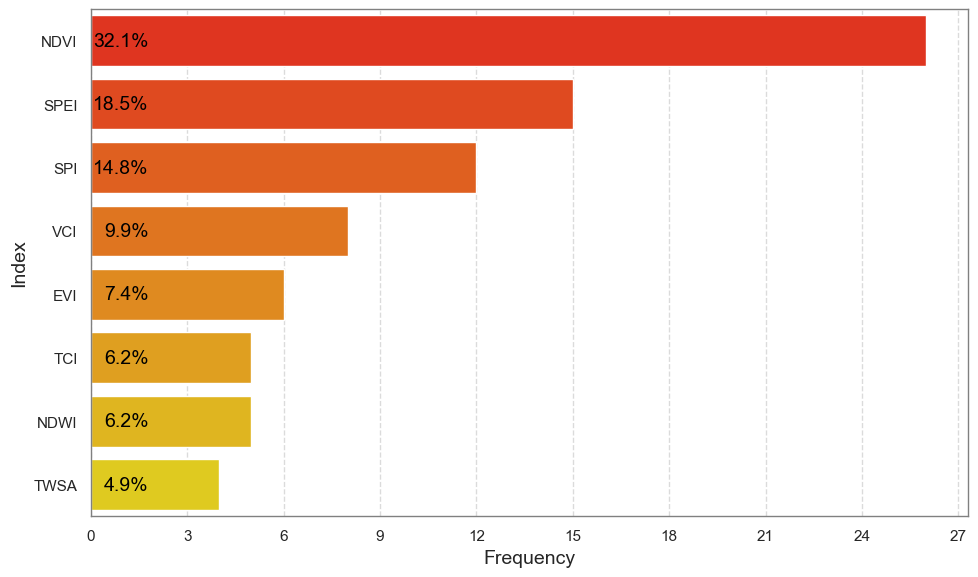

  Index  Frequency
1  NDVI         26
0  SPEI         15
3   SPI         12
2   VCI          8
4   EVI          6
5   TCI          5
6  NDWI          5
7  TWSA          4


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.ticker import MaxNLocator

def analyze_indices(path, sheet_index=1, threshold=3):
    # Carregar o arquivo Excel
    df = pd.read_excel(path, sheet_name=sheet_index)
    
    # Preencher valores NaN nas colunas 'Drought index' e 'Other index' com strings vazias
    df['drought_index'] = df['drought_index'].fillna('')
    df['other_index'] = df['other_index'].fillna('')

    # Remover entradas vazias nas colunas 'Drought index' e 'Other index'
    df = df[(df['drought_index'] != '') | (df['other_index'] != '')]

    # Combinar as colunas 'Drought index' e 'Other index'
    df['Combined index'] = df['drought_index'] + ';' + df['other_index']
    
    # Dividir os índices separados por ';' e remover espaços extras
    df['Combined index'] = df['Combined index'].str.split(';').apply(lambda x: [index.strip() for index in x if index.strip() != ''])

    # Explodir a coluna para criar linhas duplicadas para cada índice
    df = df.explode('Combined index')

    # Contagem de frequência dos índices
    index_counts = Counter(df['Combined index'])

    # Filtrar índices que aparecem mais que 'threshold' vezes
    frequent_indices = {index: count for index, count in index_counts.items() if count > threshold}

    # Criar DataFrame de análise
    df_analysis = pd.DataFrame({
        'Index': list(frequent_indices.keys()),
        'Frequency': list(frequent_indices.values())
    })

    # Ordenar por frequência
    df_analysis = df_analysis.sort_values(by='Frequency', ascending=False)

    return df_analysis

def plot_index_bar_chart(df_analysis, path_out='images/frequent_indices.pdf'):
    # Configurar o estilo e a paleta de cores usando seaborn
    sns.set_theme(style="whitegrid")  # Ajuste do estilo para manter consistência com os outros gráficos
    palette = sns.color_palette("autumn", n_colors=len(df_analysis))  # Ajuste da paleta de cores

    # Configurar a fonte para Arial e o tamanho da fonte
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 14
    
    # Criando o gráfico de barras horizontais
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Frequency', y='Index', data=df_analysis, palette=palette)

    # Configurações do gráfico
    ax.set_xlabel("Frequency", fontsize=14)
    ax.set_ylabel("Index", fontsize=14)

    # Adicionar porcentagens no início das barras
    total_indices = df_analysis['Frequency'].sum()
    for p in ax.patches:
        width = p.get_width()
        percentage = f'{width / total_indices * 100:.1f}%'
        ax.text(p.get_x() + 1.8, p.get_y() + p.get_height() / 2., 
                percentage, ha='right', va='center', fontsize=14, color='black')

    # Adicionar borda cinza e largura 1
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1)

    # Adicionar grade no eixo x
    ax.xaxis.grid(True, linestyle='--', alpha=0.7)

    # Configurar ticks do eixo x para mostrar apenas números inteiros
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Ajustar o layout para não cortar elementos
    plt.tight_layout()

    # Salvando o gráfico como um arquivo PDF
    plt.savefig(path_out, bbox_inches='tight', format='pdf', dpi=300)
    plt.show()

# Exemplo de uso:
path = "data_extraction.xlsx"
df_index_analysis = analyze_indices(path)
plot_index_bar_chart(df_index_analysis, path_out='images/frequent_indices.pdf')

# Imprimir o DataFrame de análise para verificar os resultados
print(df_index_analysis)


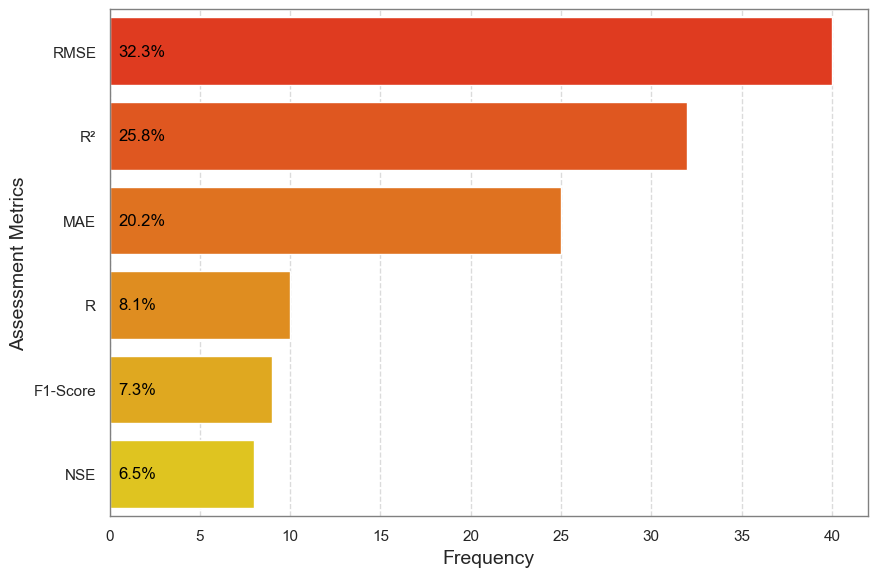

     Method  Frequency
1      RMSE         40
0        R²         32
2       MAE         25
3         R         10
4  F1-Score          9
5       NSE          8


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.ticker import MaxNLocator

def analyze_sensor_frequencies(path, sheet_index=2, threshold=6):
    # Carregar o arquivo Excel
    df = pd.read_excel(path, sheet_name=sheet_index)
    
    # Preencher valores NaN na coluna 'Assessment Metrics' com uma string vazia
    df['assessment_metrics'] = df['assessment_metrics'].fillna('')

    # Remover entradas vazias na coluna 'Assessment Metrics'
    df = df[df['assessment_metrics'] != '']

    # Dividir as métricas separadas por ';' e remover espaços extras
    df['assessment_metrics'] = df['assessment_metrics'].str.split(';').apply(lambda x: [metric.strip() for metric in x])

    # Explodir a coluna para criar linhas duplicadas para cada métrica
    df = df.explode('assessment_metrics')

    # Contagem de frequência das métricas
    metrics_counts = Counter(df['assessment_metrics'])

    # Filtrar métricas que aparecem mais que 'threshold' vezes
    frequent_metrics = {metric: count for metric, count in metrics_counts.items() if count > threshold}

    # Criar DataFrame de análise
    df_analysis = pd.DataFrame({
        'Method': list(frequent_metrics.keys()),
        'Frequency': list(frequent_metrics.values())
    })

    # Ordenar por frequência
    df_analysis = df_analysis.sort_values(by='Frequency', ascending=False)

    # Corrigir os nomes das métricas
    df_analysis['Method'] = df_analysis['Method'].replace({
        'F1-score': 'F1-Score',
        'precision': 'Precision',
        'accuracy': 'Accuracy',
        'R2': 'R²',
        'recall': 'Recall'
    })

    return df_analysis

def plot_sensor_bar_chart(df_analysis, path_out='images/metrics.pdf'):
    # Configurar o estilo e a paleta de cores usando seaborn
    sns.set_theme(style="whitegrid")  
    palette = sns.color_palette("autumn", n_colors=len(df_analysis))  # Ajuste dinâmico da paleta

    # Configurar fonte para Arial e tamanho
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 14

    # Criando o gráfico de barras horizontais
    plt.figure(figsize=(9, 6))
    ax = sns.barplot(x='Frequency', y='Method', data=df_analysis, palette=palette)

    # Configurações do gráfico
    ax.set_xlabel("Frequency", fontsize=14)
    ax.set_ylabel("Assessment Metrics", fontsize=14)

    # Adicionar porcentagens à esquerda das barras
    total_metrics = df_analysis['Frequency'].sum()
    for p in ax.patches:
        width = p.get_width()
        percentage = f'{width / total_metrics * 100:.1f}%'
        ax.text(0.5, p.get_y() + p.get_height() / 2., 
                percentage, ha='left', va='center', fontsize=12, color='black')

    # Configurar grade e bordas
    ax.xaxis.grid(True, linestyle='--', alpha=0.7)
    ax.yaxis.grid(False)
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1)

    # Configurar os ticks do eixo x para mostrar apenas números inteiros
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Ajustar layout para evitar cortes
    plt.tight_layout()

    # Salvar o gráfico como PDF
    plt.savefig(path_out, bbox_inches='tight', format='pdf', dpi=300)
    plt.show()

# Exemplo de uso:
path = "data_extraction.xlsx"
df_sensor_analysis = analyze_sensor_frequencies(path)
plot_sensor_bar_chart(df_sensor_analysis, path_out='images/metrics.pdf')

# Imprimir o DataFrame de análise para verificar os resultados
print(df_sensor_analysis)


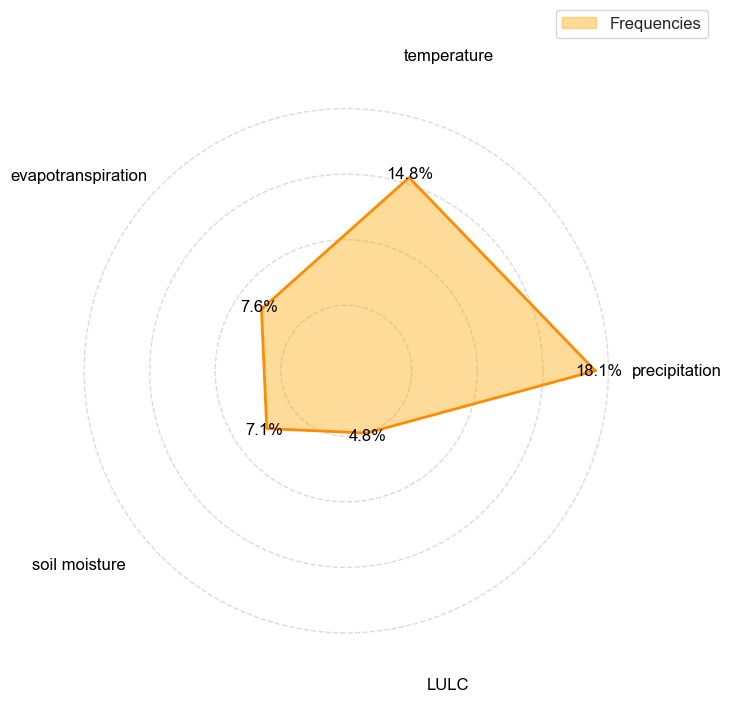

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados da segunda planilha (sheet) do arquivo Excel
data_extraction = pd.read_excel('data_extraction.xlsx', sheet_name=1)

# Remover campos vazios na coluna 'Input data'
data_extraction = data_extraction.dropna(subset=['input_data'])

# Contar a frequência das variáveis de entrada
input_counts = {}
for inputs in data_extraction['input_data']:
    for input_var in inputs.split(';'):
        input_var = input_var.strip()  # Remover espaços em branco
        if input_var in input_counts:
            input_counts[input_var] += 1
        else:
            input_counts[input_var] = 1

# Selecionar as 5 variáveis mais frequentes
top_inputs = sorted(input_counts, key=input_counts.get, reverse=True)[:5]
top_counts = [input_counts[input_var] for input_var in top_inputs]

# Calcular percentagens
total_counts = sum(input_counts.values())
percentages = [(input_counts[input_var] / total_counts) * 100 for input_var in top_inputs]

# Criar um gráfico de radar
labels = np.array(top_inputs)
stats = np.array(top_counts)

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Adicionar o primeiro ponto ao final para fechar o gráfico
stats = np.concatenate((stats, [stats[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Estilo do gráfico
fig, ax = plt.subplots(figsize=(9,8), subplot_kw=dict(polar=True))

# Preenchimento do radar
ax.fill(angles, stats, color='orange', alpha=0.4, label='Frequencies')
ax.plot(angles, stats, color='darkorange', linewidth=2, linestyle='-')

# Linhas de grade e círculo central
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.xaxis.grid(False)
ax.spines['polar'].set_visible(False)

# Ajustes de rótulos das variáveis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12, color='black')

# Remover os rótulos do eixo radial
ax.set_yticklabels([])
ax.set_ylim(0, max(stats) + 9)  # Ajustar o limite superior para dar espaçamento

# Adicionar percentagens próximas das bordas
for angle, stat, percentage, label in zip(angles[:-1], stats[:-1], percentages, labels):
    x_offset = np.sin(angle) * 0.2  # Ajustar deslocamento horizontal
    y_offset = np.cos(angle) * 0.2  # Ajustar deslocamento vertical
    ax.text(angle, stat + 0.5, f'{percentage:.1f}%', 
            horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')

# Adicionar uma legenda
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=12)

# Configurações globais de fonte e estilo
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

# Título opcional
#plt.title("Top 5 Input Variables and Their Frequencies", fontsize=16, fontweight='bold', color='darkblue')

# Salvar o gráfico como um arquivo PDF
path_out = 'images/inputVariables.pdf'
plt.savefig(path_out, bbox_inches='tight', format='pdf', dpi=300)
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


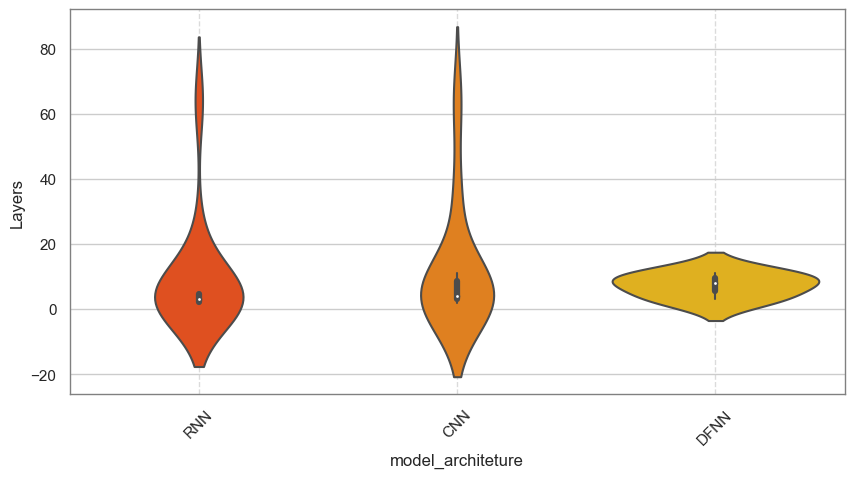

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


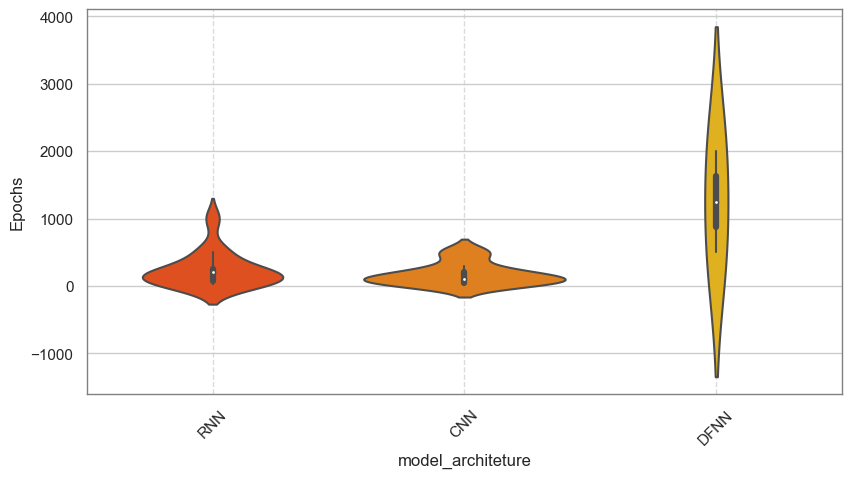

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a segunda planilha do arquivo Excel
df = pd.read_excel('data_extraction.xlsx', sheet_name=2)

# Função auxiliar para dividir strings e lidar com valores nulos
def split_and_strip(cell):
    if pd.isna(cell):
        return []
    return [item.strip() for item in str(cell).split(';')]

# Explodir a coluna 'Model Architecture'
df['model_architeture'] = df['model_architeture'].apply(split_and_strip)
df_exploded = df.explode('model_architeture')

# Filtrar para incluir apenas as arquiteturas principais
main_architectures = {'CNN', 'RNN', 'DFNN'}
df_filtered = df_exploded[df_exploded['model_architeture'].isin(main_architectures)]

# Verificar se as colunas 'Layers', 'Epochs' e 'Model Architecture' existem no DataFrame
columns_to_check = ['layers', 'epochs', 'model_architeture']
for column in columns_to_check:
    if column not in df_filtered.columns:
        raise KeyError(f"A coluna '{column}' não foi encontrada na planilha.")

# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico de violino para a relação entre 'Model Architecture' e 'Layers'
plt.figure(figsize=(10, 5))

# Configurar a fonte global
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

ax1 = sns.violinplot(x='model_architeture', y='layers', data=df_filtered, palette='autumn')
#plt.title('Distribuição do Número de Camadas por Arquitetura do Modelo')
#plt.xlabel('Arquitetura do Modelo')
plt.ylabel('Layers')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Adicionar grade tracejada no eixo x
ax1.xaxis.grid(True, linestyle='--', alpha=0.7)

# Configurar borda da imagem
for spine in ax1.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(1)

# Save the image as a PDF file
path_out = 'images/volin1.pdf'
plt.savefig(path_out, bbox_inches='tight', format='pdf')
plt.show()

# Gráfico de violino para a relação entre 'Model Architecture' e 'Epochs'
plt.figure(figsize=(9.75, 5))
ax2 = sns.violinplot(x='model_architeture', y='epochs', data=df_filtered, palette='autumn')
#plt.title('Distribuição do Número de Épocas por Arquitetura do Modelo')
#plt.xlabel('Arquitetura do Modelo')
plt.ylabel('Epochs')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Adicionar grade tracejada no eixo x
ax2.xaxis.grid(True, linestyle='--', alpha=0.7)

# Configurar borda da imagem
for spine in ax2.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(1)

# Save the image as a PDF file
path_out = 'images/volin2.pdf'
plt.savefig(path_out, bbox_inches='tight', dpi=300, format='pdf')
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

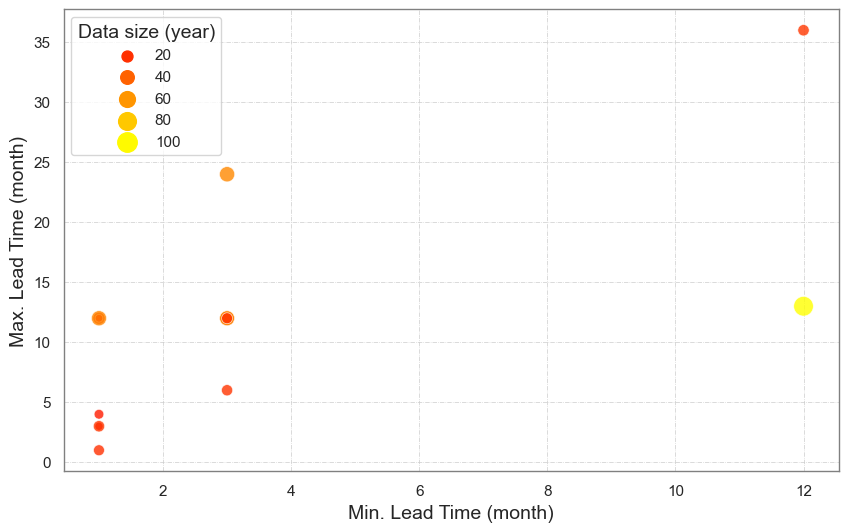

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lendo o arquivo Excel e escolhendo a sheet
df = pd.read_excel(path, sheet_name=sheetNames[4])

# Saída da imagem
path_out = 'images/scatter_LTmin_LTmax_DataSize.pdf'

# Criando um gráfico de dispersão
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = 14

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ltmin', y='Ltmax', hue='data_size', size='data_size', sizes=(30, 200), palette='autumn', data=df, alpha=0.8)

# Adicionando uma grade ao gráfico
plt.grid(True, linestyle='-.', lw=0.5)

# Configurações do eixo e do título
plt.xlabel("Min. Lead Time (month)", fontsize=14)
plt.ylabel("Max. Lead Time (month)", fontsize=14)
# plt.title("Scatter Plot of LTmin vs. LTmax with Data_size", fontsize=16, fontweight='bold')

# Adicionando uma legenda
plt.legend(title='Data size (year)', title_fontsize='14')

# Alterando a cor da borda do gráfico
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1)

# Salvando o gráfico como um arquivo PDF
plt.savefig(path_out, bbox_inches='tight', format='pdf', dpi=300)

# Exibindo o gráfico
plt.show()


['TAB1', 'TAB2', 'TAB3', 'TAB4', 'TAB5']
   Open Access (No/Yes)  Data Availability (No/Yes)  Remote Sensing (No/Yes)
0             48.571429                   67.142857                18.571429
1             51.428571                   32.857143                81.428571


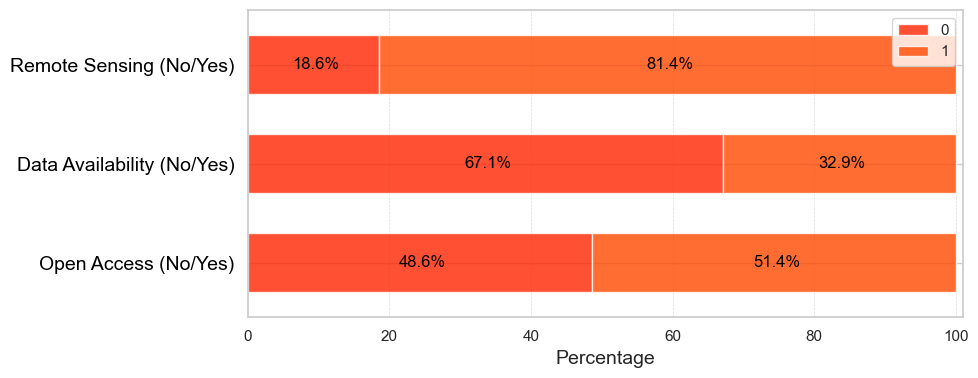

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os nomes das abas no arquivo Excel
path = "data_extraction.xlsx"
sheetNames = pd.ExcelFile(path).sheet_names
print(sheetNames)

# Definir o caminho para salvar o gráfico
path_out = 'images/stackedFeatures.pdf'

# Carregar a aba relevante
df = pd.read_excel(path, sheet_name=sheetNames[3])

# Criar um dicionário para armazenar as contagens e percentagens
D = {}

# Iterar sobre as colunas relevantes
for column in ['open_access', 'data_avaiable', 'remote_sensing']:
    # Calcular as contagens e converter para porcentagem
    counts_percentage = df[column].value_counts(normalize=True).sort_index(ascending=True) * 100
    # Adicionar ao dicionário com o nome correspondente
    if column == 'open_access':
        D['Open Access (No/Yes)'] = counts_percentage
    elif column == 'data_avaiable':
        D['Data Availability (No/Yes)'] = counts_percentage
    elif column == 'remote_sensing':
        D['Remote Sensing (No/Yes)'] = counts_percentage

# Criar DataFrame com as porcentagens, preenchendo valores ausentes com 0
dfStack = pd.DataFrame(D).fillna(0)
print(dfStack)

# Configurações de estilo
sns.set_theme(style="whitegrid", palette="autumn")
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

# Plotar o gráfico de barras empilhadas
ax = dfStack.T.plot.barh(stacked=True, 
                         color=sns.color_palette("autumn"),
                         figsize=(10, 4), 
                         edgecolor="white", 
                         width=0.6, 
                         alpha=0.8)

# Configurações adicionais
ax.set_xlabel("Percentage", fontsize=14)
ax.set_ylabel("", fontsize=14)
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
ax.xaxis.set_ticks(range(0, 101, 20))

# Adicionar rótulos de porcentagem centralizados em cada barra
for container in ax.containers:
    # Rótulos com valores ou string vazia para barras com valor 0
    labels = [f'{w:0.1f}%' if (w := v.get_width()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=12, color='black', padding=2)

# Ajustar os limites do eixo x
ax.set_xlim(0, 101)

# Estilizar os ticks do eixo y
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, color='black')

# Melhorar espaçamento geral
plt.tight_layout()

# Salvar o gráfico como arquivo PDF
plt.savefig(path_out, bbox_inches='tight', format='pdf', dpi=300)

# Exibir o gráfico
plt.show()
